In [31]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import f1_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
dfFeatures = pd.read_csv('dfFeatures.csv', index_col=0)

In [38]:
X = dfFeatures[['phone_scaled'
                , 'last_name_scaled'
                , 'first_name_scaled'
                , 'city_scaled'
                , 'address_1_scaled'
                , 'dob_scaled'
                , 'zip_scaled'
                , 'similarity']]
y = dfFeatures['MATCH'] 

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

In [4]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)

preds = gnb.predict(X_test)

print(f1_score(y_test, preds))
print(confusion_matrix(y_test, preds))
print(classification_report(y_test, preds, digits=4))

0.998679532758
[[53056     3]
 [   10  4916]]
             precision    recall  f1-score   support

          0     0.9998    0.9999    0.9999     53059
          1     0.9994    0.9980    0.9987      4926

avg / total     0.9998    0.9998    0.9998     57985



In [5]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

preds = lr.predict(X_test)

print(f1_score(y_test, preds))
print(confusion_matrix(y_test, preds))
print(classification_report(y_test, preds, digits=4))

0.998169615619
[[53059     0]
 [   18  4908]]
             precision    recall  f1-score   support

          0     0.9997    1.0000    0.9998     53059
          1     1.0000    0.9963    0.9982      4926

avg / total     0.9997    0.9997    0.9997     57985



In [39]:
dtc = DecisionTreeClassifier(random_state=42)
dtc.fit(X_train, y_train)

preds = dtc.predict(X_test)

print(f1_score(y_test, preds))
print(confusion_matrix(y_test, preds))
print(classification_report(y_test, preds, digits=4))

0.99898497767
[[53054     5]
 [    5  4921]]
             precision    recall  f1-score   support

          0     0.9999    0.9999    0.9999     53059
          1     0.9990    0.9990    0.9990      4926

avg / total     0.9998    0.9998    0.9998     57985



In [7]:
ada = AdaBoostClassifier(random_state=42)
ada.fit(X_train, y_train)

preds = ada.predict(X_test)

print(f1_score(y_test, preds))
print(confusion_matrix(y_test, preds))
print(classification_report(y_test, preds, digits=4))

0.999796954315
[[53059     0]
 [    2  4924]]
             precision    recall  f1-score   support

          0     1.0000    1.0000    1.0000     53059
          1     1.0000    0.9996    0.9998      4926

avg / total     1.0000    1.0000    1.0000     57985



In [8]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier

Using TensorFlow backend.


In [9]:
# Function to create model, required for KerasClassifier
def create_model():

    model = Sequential()
    model.add(Dense(12, input_dim=8, activation='relu'))
    model.add(Dense(6, activation='relu'))
    #model.add(Dense(4, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [10]:
kc = KerasClassifier(build_fn=create_model, epochs=20, batch_size=50, verbose=1)
kc.fit(X_train, y_train)

preds = kc.predict(X_test)

print(f1_score(y_test, preds))
print(confusion_matrix(y_test, preds))
print(classification_report(y_test, preds, digits=4))

Epoch 1/20
117727/117727 [==============================] - 2s 18us/step - loss: 0.0916 - acc: 0.9709
Epoch 2/20
117727/117727 [==============================] - 2s 17us/step - loss: 0.0206 - acc: 0.9996
Epoch 3/20
117727/117727 [==============================] - 2s 17us/step - loss: 0.0074 - acc: 0.9998
Epoch 4/20
117727/117727 [==============================] - 2s 17us/step - loss: 0.0030 - acc: 0.9998
Epoch 5/20
117727/117727 [==============================] - 2s 17us/step - loss: 0.0014 - acc: 0.9999
Epoch 6/20
117727/117727 [==============================] - 2s 17us/step - loss: 8.7163e-04 - acc: 0.9999
Epoch 7/20
117727/117727 [==============================] - 2s 17us/step - loss: 6.5058e-04 - acc: 0.9999
Epoch 8/20
117727/117727 [==============================] - 2s 17us/step - loss: 5.3182e-04 - acc: 0.9999
Epoch 9/20
117727/117727 [==============================] - 2s 17us/step - loss: 4.4494e-04 - acc: 0.9999
Epoch 10/20
117727/117727 [==============================] - 2s 17

In [11]:
dfFeatures.describe()

,MATCH,phone_scaled,last_name_scaled,first_name_scaled,city_scaled,state_scaled,address_1_scaled,address_1_2_scaled,dob_scaled,zip_scaled,similarity
count,175712.000000,175712.000000,175712.000000,175712.000000,175712.000000,175712.000000,175712.000000,175712.000000,175712.000000,175712.000000,175712.000000
mean,0.085361,0.238228,0.424442,0.484945,0.321429,0.805616,0.539446,0.021300,0.491614,0.682152,0.184041
std,0.279419,0.259188,0.269460,0.216084,0.358804,0.137112,0.438450,0.132472,0.225343,0.132447,0.153283
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.300000,0.000000,0.000000,0.000000,0.000000,0.100000
25%,0.000000,0.100000,0.200000,0.300000,0.000000,0.700000,0.000000,0.000000,0.300000,0.600000,0.115384
50%,0.000000,0.200000,0.400000,0.400000,0.200000,0.700000,0.800000,0.000000,0.500000,0.700000,0.135343
75%,0.000000,0.300000,0.500000,0.600000,0.500000,1.000000,1.000000,0.000000,0.600000,0.700000,0.167072
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Features sorted by their score:
   Importance            Feature
0    0.988411         similarity
1    0.007904         dob_scaled
2    0.001532       phone_scaled
3    0.001407         zip_scaled
4    0.000326  first_name_scaled
5    0.000178   last_name_scaled
6    0.000145        city_scaled
7    0.000097   address_1_scaled


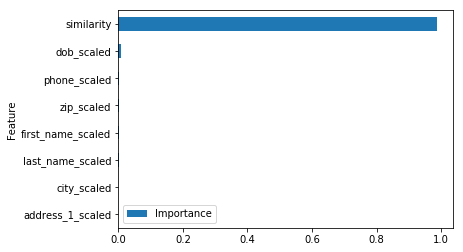

In [40]:
# Feature importances from the Decision Tree Classifier
names = X.columns
f = pd.DataFrame(sorted(zip(dtc.feature_importances_
                                       , names), reverse=True
                                  ), columns = ['Importance', 'Feature'])
print("Features sorted by their score:")
print(f)

f.plot(x='Feature',y='Importance', kind='barh')
plt.gca().invert_yaxis()

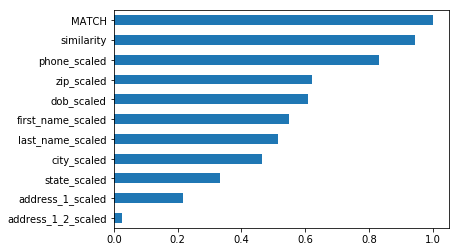

In [13]:
# Pearson's correlation between various features and MATCH

dfFeatures.corr()['MATCH'].sort_values().plot('barh')

In [14]:
dfFeatures.drop('MATCH', axis=1)

,id_org,id_match,phone_scaled,last_name_scaled,first_name_scaled,city_scaled,state_scaled,address_1_scaled,address_1_2_scaled,dob_scaled,zip_scaled,similarity
0,rec-0-org,rec-0-dup-0,1.0,1.0,1.0,0.7,1.0,0.8,0.0,1.0,1.0,0.683051
47132,rec-17305-org,rec-0-dup-0,0.0,0.8,1.0,0.2,0.8,0.0,0.0,0.5,0.7,0.138749
63515,rec-19801-org,rec-0-dup-0,0.0,0.4,0.4,0.4,0.7,0.3,0.0,0.4,0.7,0.113165
89764,rec-23883-org,rec-0-dup-0,0.4,0.3,0.5,0.2,0.8,0.3,0.0,0.7,0.6,0.101841
1,rec-0-org,rec-0-dup-1,0.9,0.8,0.9,1.0,1.0,0.8,0.0,1.0,1.0,0.652186
53321,rec-18225-org,rec-0-dup-1,0.2,0.3,0.5,0.3,0.7,0.8,0.0,0.7,0.8,0.135779
139930,rec-4547-org,rec-0-dup-1,0.2,0.4,0.4,0.0,0.7,0.8,0.0,0.5,0.7,0.104159
2,rec-0-org,rec-4547-dup-0,0.2,0.3,0.4,0.0,0.7,1.0,0.0,0.4,0.5,0.130793
25604,rec-13929-org,rec-4547-dup-0,0.1,0.4,0.6,0.9,1.0,0.4,0.0,0.3,0.5,0.235433
53322,rec-18225-org,rec-4547-dup-0,0.3,0.2,0.4,0.0,0.7,1.0,0.0,0.4,0.5,0.109361


/home/ubuntu/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


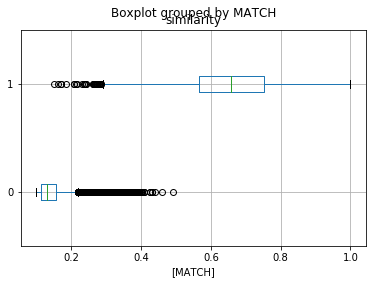

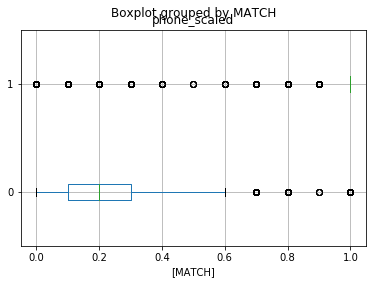

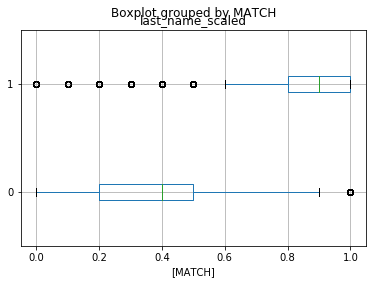

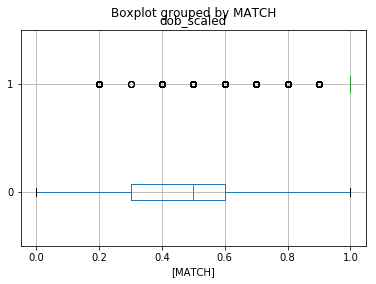

In [15]:
plt.figure();

bp = dfFeatures[['MATCH', 'similarity']].boxplot(by='MATCH', vert=False)
bp = dfFeatures[['MATCH', 'phone_scaled']].boxplot(by='MATCH', vert=False)
bp = dfFeatures[['MATCH', 'last_name_scaled']].boxplot(by='MATCH', vert=False)
bp = dfFeatures[['MATCH', 'dob_scaled']].boxplot(by='MATCH', vert=False)

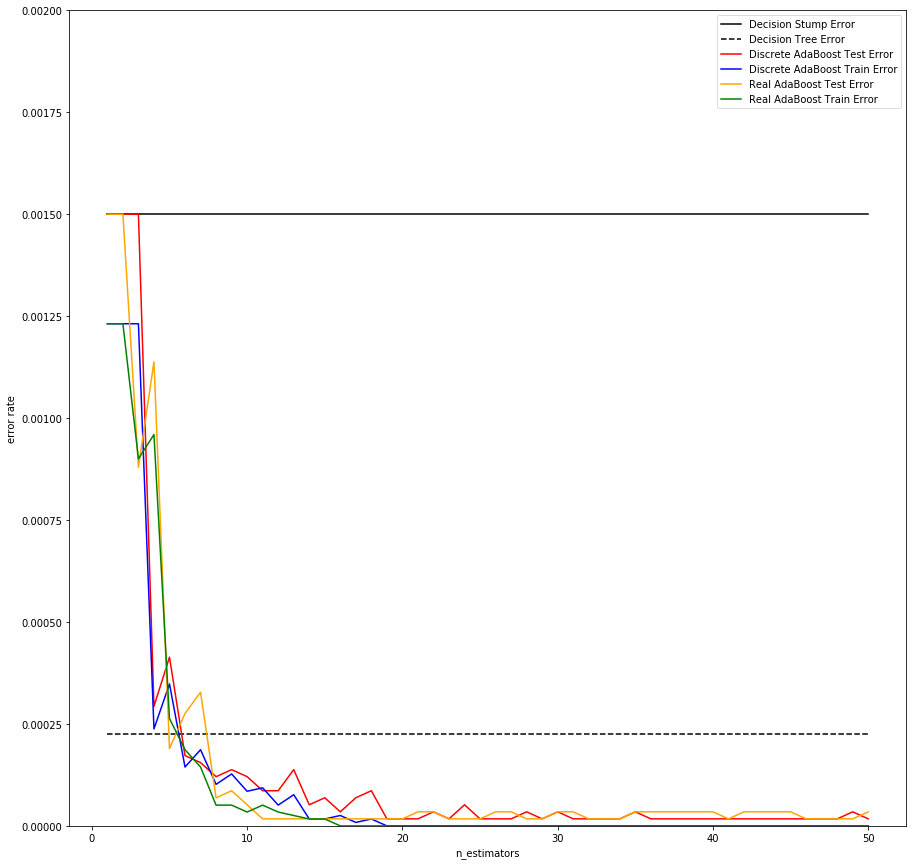

In [16]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import zero_one_loss
from sklearn.ensemble import AdaBoostClassifier


n_estimators = 50
learning_rate = 1.

dt_stump = DecisionTreeClassifier(max_depth=1, min_samples_leaf=1)
dt_stump.fit(X_train, y_train)
dt_stump_err = 1.0 - dt_stump.score(X_test, y_test)

dt = DecisionTreeClassifier(max_depth=9, min_samples_leaf=1)
dt.fit(X_train, y_train)
dt_err = 1.0 - dt.score(X_test, y_test)

ada_discrete = AdaBoostClassifier(
    base_estimator=dt_stump,
    learning_rate=learning_rate,
    n_estimators=n_estimators,
    algorithm="SAMME")
ada_discrete.fit(X_train, y_train)

ada_real = AdaBoostClassifier(
    base_estimator=dt_stump,
    learning_rate=learning_rate,
    n_estimators=n_estimators,
    algorithm="SAMME.R")
ada_real.fit(X_train, y_train)

fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111)

ax.plot([1, n_estimators], [dt_stump_err] * 2, 'k-',
        label='Decision Stump Error')
ax.plot([1, n_estimators], [dt_err] * 2, 'k--',
        label='Decision Tree Error')

ada_discrete_err = np.zeros((n_estimators,))
for i, y_pred in enumerate(ada_discrete.staged_predict(X_test)):
    ada_discrete_err[i] = zero_one_loss(y_pred, y_test)

ada_discrete_err_train = np.zeros((n_estimators,))
for i, y_pred in enumerate(ada_discrete.staged_predict(X_train)):
    ada_discrete_err_train[i] = zero_one_loss(y_pred, y_train)

ada_real_err = np.zeros((n_estimators,))
for i, y_pred in enumerate(ada_real.staged_predict(X_test)):
    ada_real_err[i] = zero_one_loss(y_pred, y_test)

ada_real_err_train = np.zeros((n_estimators,))
for i, y_pred in enumerate(ada_real.staged_predict(X_train)):
    ada_real_err_train[i] = zero_one_loss(y_pred, y_train)

ax.plot(np.arange(n_estimators) + 1, ada_discrete_err,
        label='Discrete AdaBoost Test Error',
        color='red')
ax.plot(np.arange(n_estimators) + 1, ada_discrete_err_train,
        label='Discrete AdaBoost Train Error',
        color='blue')
ax.plot(np.arange(n_estimators) + 1, ada_real_err,
        label='Real AdaBoost Test Error',
        color='orange')
ax.plot(np.arange(n_estimators) + 1, ada_real_err_train,
        label='Real AdaBoost Train Error',
        color='green')

ax.set_ylim((0.0, 0.002))
ax.set_xlabel('n_estimators')
ax.set_ylabel('error rate')

leg = ax.legend(loc='upper right', fancybox=True)
leg.get_frame().set_alpha(0.7)

plt.show()